Sep 10. Check data in Yang et al. catalog

- find the range of Abs mag z-band

- apply the model from H-Siena to galaxies here;

In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import astropy.io.fits as fits

In [3]:
path='/data/lemn/DESIdata/'

In [4]:
#load data 
data = fits.getdata(path+'galaxies/DESIDR9_NGC_galaxy.fits')

In [5]:
hdul = fits.open(path+'galaxies/DESIDR9_NGC_galaxy.fits')
hdul.info()
hdul[0].header[1]
hdul[1].columns

Filename: /data/lemn/DESIdata/galaxies/DESIDR9_NGC_galaxy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     20   67197600R x 6C   [D, D, D, D, D, D]   


ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'z'; format = 'D'
    name = 'L'; format = 'D'
    name = 'M_zband'; format = 'D'
    name = 'err_z'; format = 'D'
)

In [ ]:
M_z = data['M_zband']

In [ ]:
print(M_z)

[-19.38372 -22.19317 -20.58881 ... -19.14557 -21.15598 -21.68771]


(array([3.0000000e+01, 2.9100000e+02, 6.3732700e+05, 2.7722004e+07,
        3.2854233e+07, 5.3468590e+06, 6.0618900e+05, 2.8115000e+04,
        2.4530000e+03, 9.9000000e+01]),
 array([-28.21651 , -26.397512, -24.578514, -22.759516, -20.940518,
        -19.12152 , -17.302522, -15.483524, -13.664526, -11.845528,
        -10.02653 ]),
 <BarContainer object of 10 artists>)

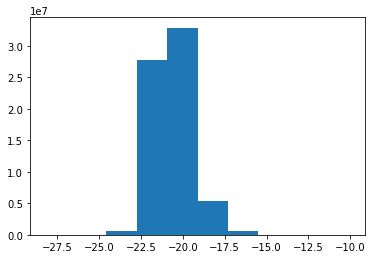

In [ ]:
plt.hist(M_z)

In [ ]:
def model(theta, x):
    a, alpha, b, beta, M1, log_f = theta
    model = a*(x/M1)**alpha + b*(x/M1)**beta
    return model

In [ ]:
#model's parameters from MCMC
a     = 16.768    #+3.078−2.372 
alpha = 1.084     #+0.738−0.604
b     = 52.496    #+32.564−33.954
beta  = 27.291    #+1.086−1.035
M1    = -19.953   #+0.751−0.361
log_f = -0.220    #+0.071−0.068
theta = [a, alpha, b, beta, M1, log_f]

In [ ]:
#number of GCs for each galaxies 
N_GC = model(theta, M_z)

Text(0, 0.5, 'N_GC')

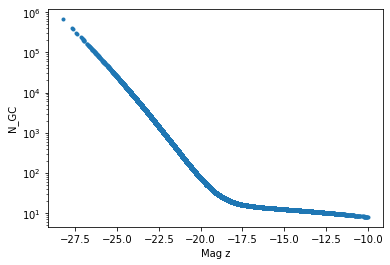

In [13]:
plt.yscale('log')
plt.plot(M_z, N_GC, '.')
plt.xlabel('Mag z')
plt.ylabel('N_GC')

In [87]:
#load infor of members in group
mem = fits.getdata(path+'members/iDESIDR9_NGC_1.fits')

In [88]:
igroup_ID = mem['groupID']

In [124]:
#load infor of members in group
group = fits.getdata(path+'groups/DESIDR9_NGC_group.fits')

In [146]:
hdul = fits.open(path+'groups/DESIDR9_NGC_group.fits')
hdul.info()
hdul[0].header[1]
hdul[1].columns

Filename: /data/lemn/DESIdata/groups/DESIDR9_NGC_group.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     20   51440885R x 6C   [D, D, D, D, D, D]   


ColDefs(
    name = 'groupID'; format = 'D'
    name = 'richness'; format = 'D'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'z'; format = 'D'
    name = 'log M_h [M_sun/h]'; format = 'D'
)

In [148]:
group['richness'][a]

array([670., 545., 531., ...,  85.,  85.,  85.])

In [153]:
M_group = group['log M_h [M_sun/h]'] #[M_sun/h]

In [157]:
h = 0.7     #Planck parameters
M_group = 10**(M_group)*h  # [M_sun], unit in catalog is log10 Msun

In [154]:
print(M_group)

[15.4441 15.1565 15.2914 ... 11.694  12.3852 11.4885]


In [90]:
group_ID = group['groupID'] #group ID correspond to M_group

- find galaxies in the same group;

- sum up their GCs and plot M_h of group vs. #GCs.

In [221]:
#create array to save #GCs in groups
N_GC_group = np.zeros(len(group_ID))

In [222]:
import time
t0 = time.time()

In [223]:
for i in range(6300, ): #len(group_ID)):
    for j in range(0, len(igroup_ID)):
        if group_ID[i] == igroup_ID[j]:
            #print(i,j)
            N_GC_group[i] += N_GC[j]

In [224]:
t1 = time.time()
print('running time', t1-t0)

running time 677.2989816665649


continue running from 6300th to th galaxy

In [254]:
N_save3 = np.zeros(6300-6265)
M_save3 = np.zeros(6300-6265)
ii = 0
for i in range (6265,6300):
    N_save3 [ii] = N_GC_group[i]
    M_save3[ii]  = M_group[i]
    ii +=1

In [263]:
a = np.where(N_GC_group != 0)
print(a)

(array([6263, 6264, 6265, 6266, 6267, 6268, 6269, 6270, 6271, 6272, 6273,
       6274, 6275, 6276, 6277, 6278, 6279, 6280, 6281, 6282, 6283, 6284,
       6285, 6286, 6287, 6288, 6289, 6290, 6291, 6292, 6293, 6294, 6295,
       6296, 6297, 6298, 6299]),)


In [255]:
print(N_save3)

[12283.50402751 13507.56579213 12381.78990254  7212.65354392
 10955.27060408 18619.23684563 16162.74978306 14626.93066308
 20089.39588739  9369.40534223 10813.89905419  5622.97295108
  5799.34521119 11411.41796132  8573.25525241  8520.32281535
 13083.55435782 16058.84907588  9902.02366626 13324.10640215
 11184.33578781 14787.97126473 25193.4731083  14932.78192881
 12154.75665966 14729.7374002  16867.02759119  5578.26989796
 17587.95053376  7125.18422705  4943.94218323 12324.53219081
  8539.25831815 18064.89289265 18820.90097494]


Text(0, 0.5, 'N_GC')

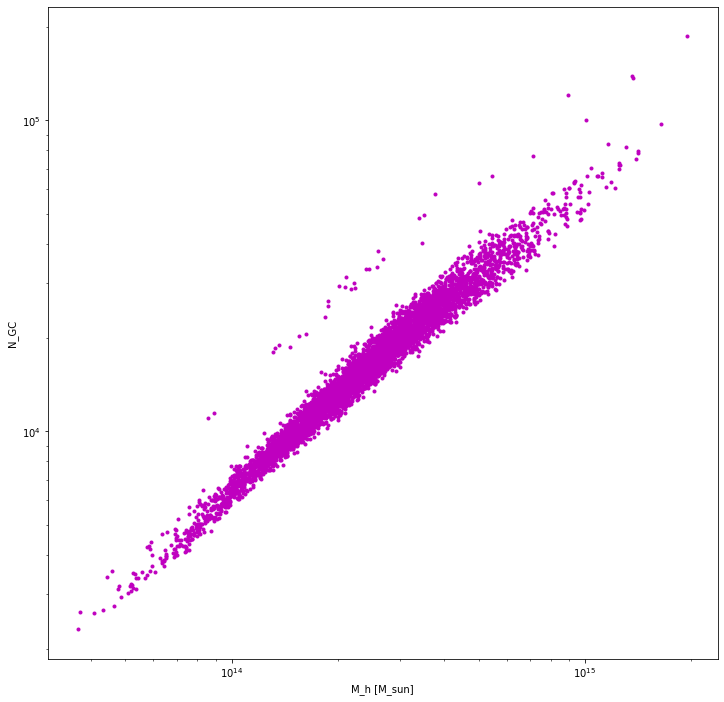

In [260]:
plt.figure(figsize=(12,12))
for i in range(0,len(a)):
    plt.plot(M_save[i], N_save[i], 'm.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M_h [M_sun]')
plt.ylabel('N_GC')

In [116]:
#load theory results
M_halo_theo                 = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(0))
N_GC_Mill_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(1))
err_N_GC_Mill_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(4))
N_GC_COCO_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(5))
err_N_GC_COCO_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(0))
N_GC_Mill_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(1))
err_N_GC_Mill_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(4))
N_GC_COCO_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(5))
err_N_GC_COCO_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(6))

In [117]:
# load EMOSAICS Fig.1 data
mass_E   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(0))
triangle = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(1))
square   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(2))
star     = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(3))

In [185]:
Atlas_H = fits.getdata('/data/lemn/results/M_h_NGCs_Harris-Atlas.fits')

In [186]:
check = Atlas_H['check T F central']
sum_NGC = Atlas_H['NGCs']
M_h_array = Atlas_H['M_h M_sun']

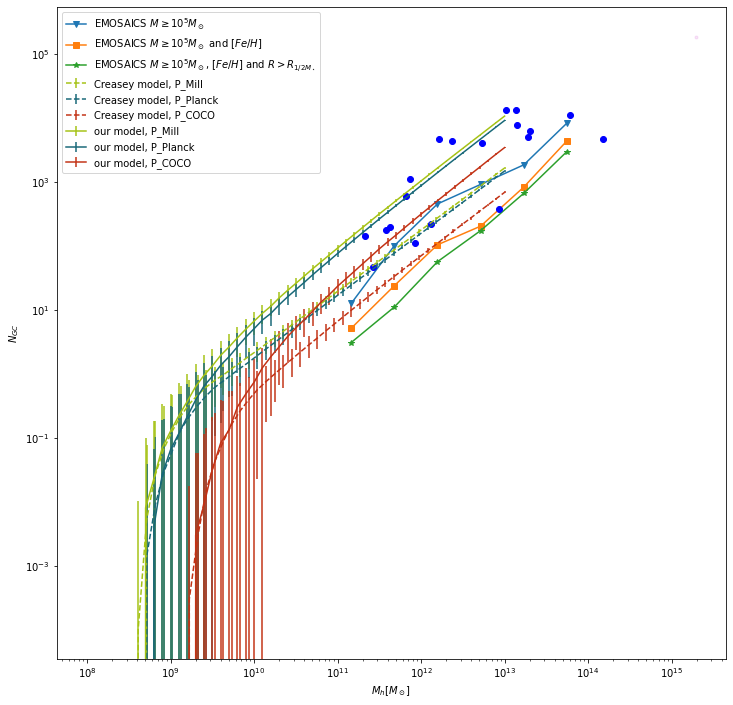

In [ ]:
plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale("log")
plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO')
plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO')

plt.plot(mass_E, triangle, 'v-', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
plt.plot(mass_E, square,   's-', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
plt.plot(mass_E, star, '*-',     label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')

for i in range(0,len(a)):
    plt.plot(M_save[i], N_save[i], 'm.', alpha=0.1)
    
for i in range(0,len(check)):
    if check[i] == 1:
        plt.plot(M_h_array[i],sum_NGC[i], 'bo')#, label = '#GCs in halos, true cen')
    #elif check[i] == 1.5:
    #    plt.plot(M_h_array[i],sum_NGC[i], 'b*')#, label = '#GCs in halos, fake cen')
    #elif check[i] == 0:
    #    plt.plot(M_h_array[i],sum_NGC[i], 'b+')#, label = '#GCs in halos, single gal')

plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()#loc=(1.1,0))
plt.savefig('tot_GC2.pdf')
plt.show()